# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [38]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tell iPython to include plots inline in the notebook
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:.5f}'.format
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
num_features=data.shape[1]
num_data_points=data.shape[0]
print "Dataset has {} rows, {} columns".format(num_data_points,num_features)
print data.head()  # print the first 5 rows
print data.describe()

'''
TODOs:
1. Create 3-D plot for pca vectors.
2. Apply PCA on ICA-demixed-transformed data.
3. Draw elbow graph to identify k in k-means.
'''

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185
             Fresh        Milk     Grocery      Frozen  Detergents_Paper  Delicatessen
count    440.00000   440.00000   440.00000   440.00000         440.00000     440.00000
mean   12000.29773  5796.26591  7951.27727  3071.93182        2881.49318    1524.87045
std    12647.32887  7380.37717  9503.16283  4854.67333        4767.85445    2820.10594
min        3.00000    55.00000     3.00000    25.00000           3.00000       3.00000
25%     3127.75000  1533.00000  2153.00000   742.25000         256.75000     408.25000
50%     8504.00000  3627.00000  4755.50000  1526.00000        

'\nTODOs:\n1. Create 3-D plot for pca vectors.\n2. Apply PCA on ICA-demixed-transformed data.\n3. Draw elbow graph to identify k in k-means.\n'

   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185
>>>>>>>>>> Pairwise scatter and histograms along diagonal, of ORIGINAL DATA >>>>>>>>>> 



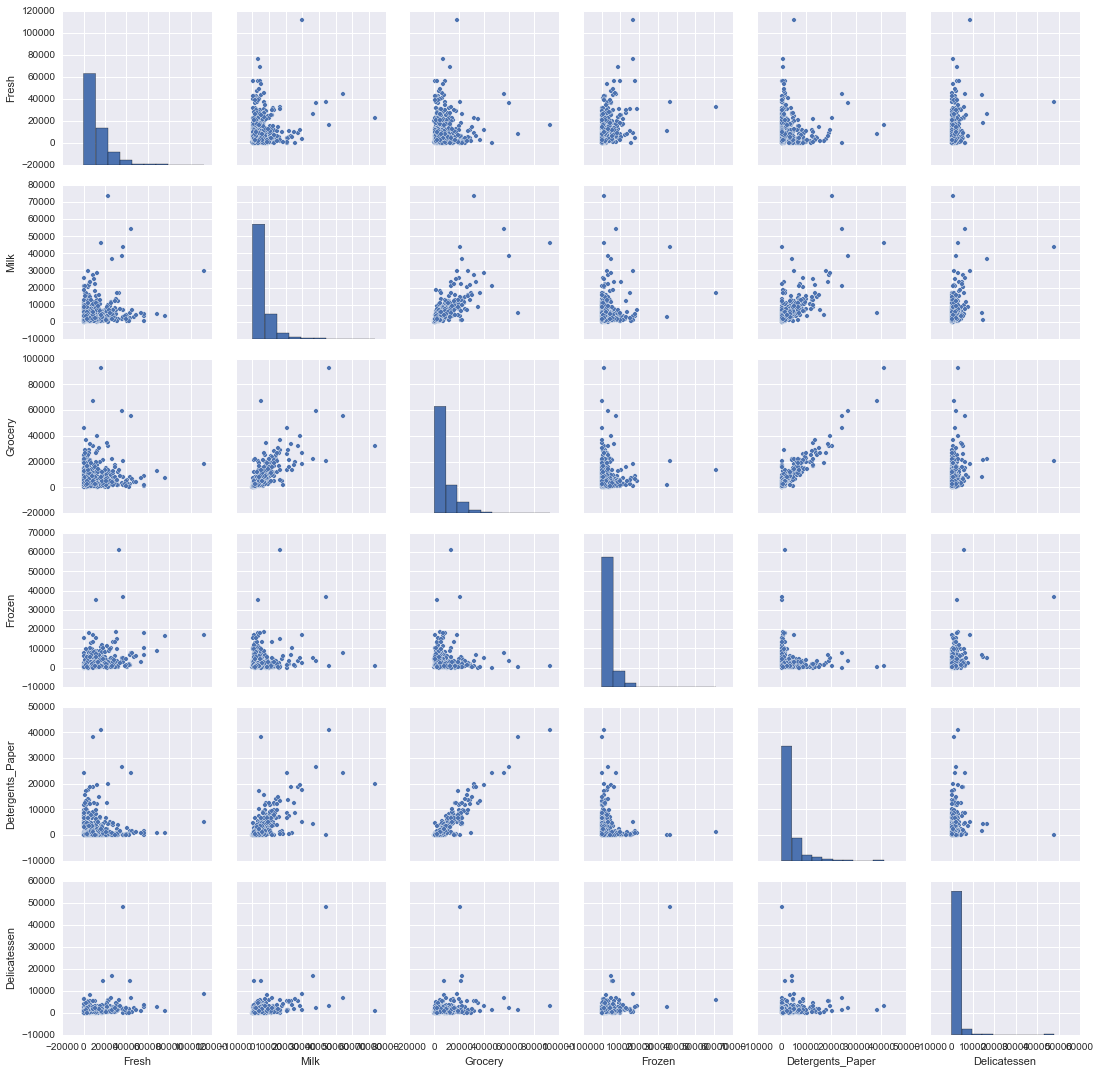

In [39]:
# Plot pairwise scatter, and individual histograms to find any apparent relationship.


print data.head(5)

print '>'*10, "Pairwise scatter and histograms along diagonal, of ORIGINAL DATA", '>'*10,"\n"
sns.pairplot(data);

	 Since data is skewed, we can take log to make it Gaussian.

    Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0 4.10274 3.98480  3.87858 2.33041           3.42716       3.12646
1 3.84862 3.99167  3.98082 3.24601           3.51759       3.24944
2 3.80298 3.94488  3.88559 3.38112           3.54605       3.89454
3 4.12271 3.07773  3.62542 3.80645           2.70501       3.25237
4 4.35440 3.73320  3.85721 3.59273           3.24969       3.71475
>>>>>>>>>>  Pairwise scatter and histograms along diagonal, of LOG10 of DATA  >>>>>>>>>> 

	 Removed scaling since units are same, and feature-wise expenses are part of same expense, i.e. belong to same part.

	  Adding Total as a dummy column would reveal that that is the primary component. 	


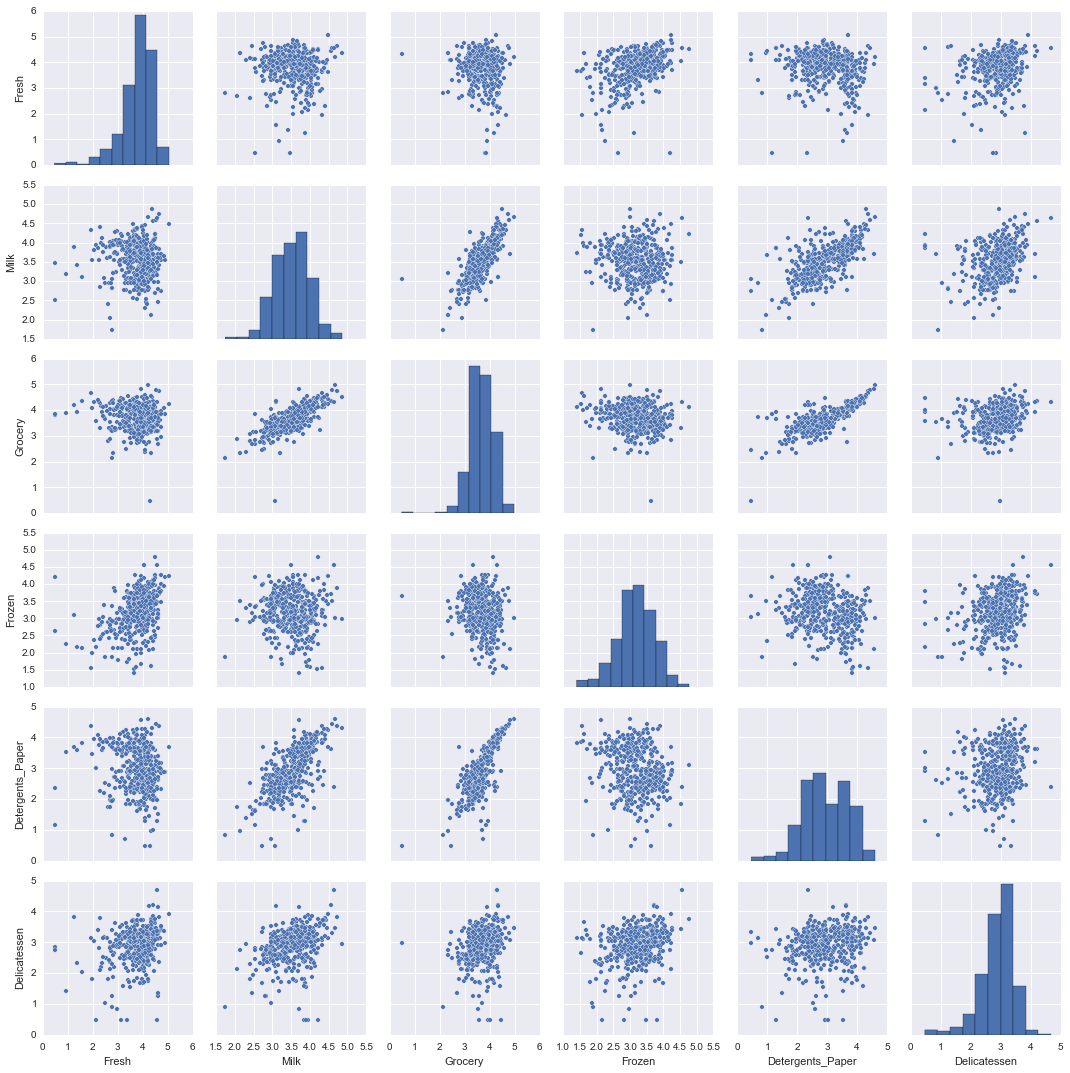

In [40]:
# Cleaning outliers could be useful, since it would remove noise which is more prevelent in low-variance components.
# But it would also remove some data points that could make the potential cluster.

print "\t Since data is skewed, we can take log to make it Gaussian.\n"
data=np.log10(data)

# And draw pairwise plot again.

print data.head(5)

print '>'*10," Pairwise scatter and histograms along diagonal, of LOG10 of DATA ", '>'*10,"\n"
sns.pairplot(data);

print  "\t Removed scaling since units are same, and feature-wise expenses are part of same expense, i.e. belong to same part.\n"
#from sklearn import preprocessing
#cleaned_data[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']] = cleaned_data[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']].apply(lambda x: preprocessing.StandardScaler().fit_transform(x))

print "\t  Adding Total as a dummy column would reveal that that is the primary component. \t"

##Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer:

Idea 1. Based on data spread, first PCA would be either fresh, or it could be combination of milk and groceries.
Second PCA could include Frozen and Detergent_Paper, and Third PCA could be delicatessen.

Idea 2. Perishability could be the differentiator in consumables / non-Delicatessen. ICA could identify the size or type of store, as this capability to manage perishables would depend on size or type of business.

###PCA

['Fresh' 'Milk' 'Grocery' 'Frozen' 'Detergents_Paper' 'Delicatessen']
[[-0.17371704  0.394463    0.45436364 -0.17219603  0.74551495  0.1494356 ]
 [ 0.68513571  0.16239926  0.06937908  0.487691    0.04191162  0.50970874]
 [ 0.67351166 -0.03306794  0.03218274 -0.28481122  0.21824404 -0.64459672]
 [-0.21432619  0.0185577   0.06448674  0.80608348  0.19005006 -0.51348977]
 [ 0.00082162 -0.72228834 -0.34799325  0.03624337  0.56366476  0.19536639]
 [ 0.02927638 -0.54303508  0.81390826  0.0174477  -0.20244363  0.02283197]]
[ 0.44237417  0.27657107  0.11617342  0.09617719  0.0457568   0.02294735]

***** PCA on scaled data. ***** 

*****  Cumm variance: ***** 
      pca
0 0.44237
1 0.71895
2 0.83512
3 0.93130
4 0.97705
5 1.00000


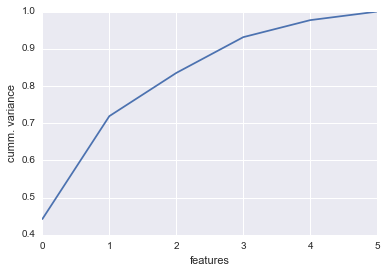

	 We can see that elbow is formed at n=3 which means FOUR primary components can explain 93% variance.



In [41]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
# Using original data
from sklearn.decomposition import PCA
pca = PCA(n_components=num_features,whiten=True)
pca.fit(data)

# Print the components and the amount of variance in the data contained in each dimension
print data.columns.values
print pca.components_
print pca.explained_variance_ratio_


print "\n",'*'*5,"PCA on scaled data.",'*'*5,"\n"
pc_df=pd.DataFrame({"pca":pca.explained_variance_ratio_})
pc_cmf_df=np.cumsum(pc_df)
print '*'*5," Cumm variance:",'*'*5,"\n",pc_cmf_df
plt.plot(pc_cmf_df)
plt.ylabel('cumm. variance')
plt.xlabel('features')
plt.show()


print "\t We can see that elbow is formed at n=3 which means FOUR primary components can explain 93% variance.\n"

----------------------------------------------------------------------------------------------------
PC1 / PC2: Bi-plot of log-scaled data
----------------------------------------------------------------------------------------------------


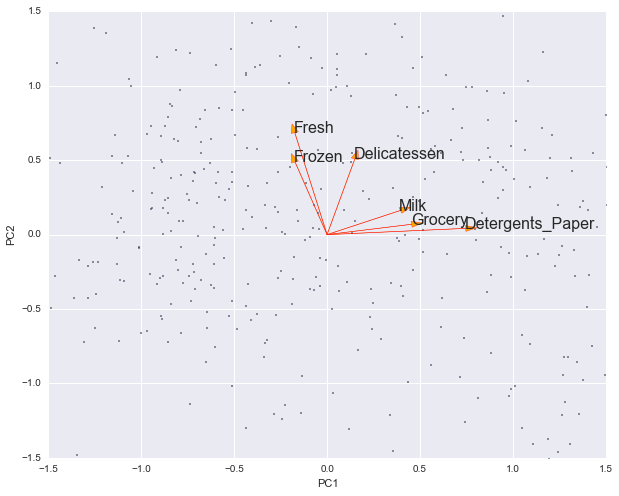


  Above bi-plot shows the 2 primary components having most variance. 



In [42]:
'''Following function has been taken from Udacity Forum: 
https://discussions.udacity.com/t/
having-trouble-with-pca-and-ica-specifically-with-explaining-what-the-dimensions-mean/41890/12
'''

def biplot12(df):
    # Fit on 2 components
    pca = PCA(n_components=2, whiten=True).fit(df)
    
    # Plot transformed/projected data
    ax = pd.DataFrame(
        pca.transform(df),
        columns=['PC1', 'PC2']
    ).plot(kind='scatter', x='PC1', y='PC2', figsize=(10, 8), s=1.5)

    # Plot arrows and labels
    for i, (pc1, pc2) in enumerate(zip(pca.components_[0], pca.components_[1])):
        ax.arrow(0, 0, pc1, pc2, width=0.002, fc='orange', ec='red')
        ax.annotate(df.columns[i], (pc1, pc2), size=16)

    return ax

print '-'*100
print "PC1 / PC2: Bi-plot of log-scaled data"
print '-'*100
ax = biplot12(data)
# Play around with the ranges for scaling the plot
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
plt.show()

print "\n  Above bi-plot shows the 2 primary components having most variance. \n"


**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: Variance drops fast for first 2 dimentions, but then reduces slowly for remaining dimentions.
Given the PCA variance graphs above, first elbow is formed at 2nd PCA component and second elbow is formed at 4th component, for the log-scaled data. But since there are data points that have some variance along multiple PCAs. 

**3)** What do the dimensions seem to represent? How can you use this information?

Answer:  PCA here can be used in 2 ways here: 1.) to identify similar customers. 2.)To find similar features. But target here is to find similar customers, and first 2 primary components seem to cover a most of variance. 

Then, first PCA dimention corresponds to a segment that spends mostly on Fresh and Frozen products.

Second PCA corresponds that spend mostly on Grocery, and significantly on Milk and Detergent_Paper in that order.

We can use this information in many ways: 
1.) To transform the data along these 2 PCA, and then find cluster of users using transformed data. But this may not be good approach, since PCA-transformed data might loose some information which could impact be useful for un-biased clustering. 

2.) To do clustering independently, and then compare the results with those from PCA, to see if both these results are convergent of divergent.

3.) We can use the results of PCA further components for supervised learning analysis - regression or classification.

4.) We could also use K=4 for k-mens clustering. Although value of K could depend on elbow in sum-of-square vs k plot.

###ICA



['Fresh' 'Milk' 'Grocery' 'Frozen' 'Detergents_Paper' 'Delicatessen']
[[ -1.12379662e-02   3.23585612e-02  -5.15398589e-03  -4.15504790e-03
    2.03813583e-02   8.50948023e-04]
 [  5.86654875e-03   2.22172387e-02   5.19250172e-02  -1.57544499e-02
   -7.56867296e-02   5.24785181e-03]
 [ -4.28086162e-03  -2.39618777e-02  -6.49723740e-03  -1.30266674e-02
    1.21965020e-02   5.32025227e-02]
 [  1.49733371e-02  -5.85699905e-02   7.09987928e-02   6.03476923e-03
    4.48719916e-03  -4.61304099e-03]
 [ -1.92587777e-02   7.10446797e-03   1.02914348e-02   4.91612629e-02
   -9.23482191e-03   4.23604846e-03]
 [  4.51846835e-02   2.02403940e-02  -1.96619401e-02  -5.83641347e-05
    1.53690904e-02  -4.19604421e-03]]


[[-0.78209001  1.0260288  -0.66911777 -0.36322374  0.7862592  -0.41211547]
 [ 0.03132591  0.70547576  1.05611266 -0.89957233 -2.14189389 -0.19301786]
 [-0.45124055 -0.75418157 -0.70971796 -0.77344149  0.53678497  2.19656222]
 [ 0.46440493 -1.84809565  1.6326234   0.10794659  0.30180

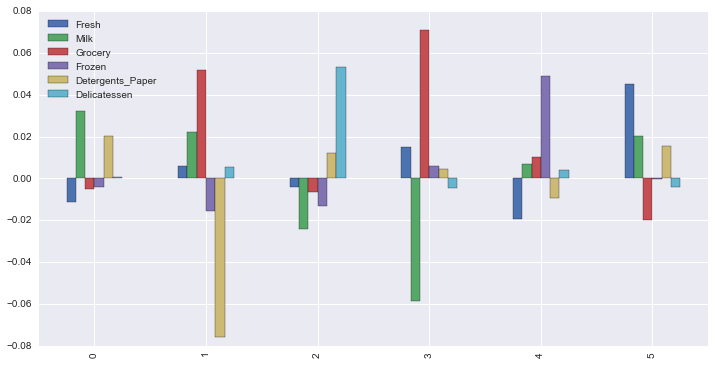

In [43]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
from sklearn import preprocessing

scaled_data=data.copy(deep=True)

#from sklearn import preprocessing
scaled_data[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']] = scaled_data[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']].apply(lambda x: preprocessing.StandardScaler().fit_transform(x))

ica = FastICA(whiten=True,random_state=0)
transformed_data=ica.fit_transform(scaled_data)


# barplot
pd.DataFrame(ica.components_, columns = data.columns).plot(kind = 'bar', figsize = (12, 6))
#
# Print the independent components

print "\n"
print scaled_data.columns.values
print ica.components_

print "\n"
print preprocessing.StandardScaler().fit_transform(ica.components_)


print "\n \n"


**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer: 

-> Store of type 1 and 3 buy primarily Groceries, but also some Milk and Fresh.


-> Store 0 (ZERO) buys Milk, and Detergent and Paper.


-> Stores of type 2 specializes in Delicacies.


-> Store of type 4 specializes in Frozen items.


-> Store of type 5 mostly uses Fresh and Milk, and some Detergent_Paper.



So some stores are specialized, while others are general stores.
There could be further classification in general stores, by Groceries, Detergent_Paper, and Milk.

ICA analysis above can be used by the distributor to deduce following:
1. Most people who buy Milk, also buy either Groceries or detergent_paper.
2. Those who buy Delicacies and Frozen, buy them exclusively without combining with any other things.
3. People who buy Fresh produce also buy some milk.
4. Stores that specialize in Groceries dont buy Milk.

So Distributor could use this to decide to mix of products to grouped while supplying to shops.

##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: 

K-Means

1. k-means is intuitive, and fast.
2. k-means can be computed and stored, for later application. This would allow quickly finding similarity. 
3. K-Means reduces intra-cluster distance ( Sum-Squared), thus depends on the distance metric.
4. But k-means is strict, and has hard boundaries.
5. Asusmes distribution to be homogeneous in all directions, and assumes shape to be spherical.


GMM
1. GMM is a probabilistic model, that maximizes the probability of an observation belonging to a latent Gaussian distribution.
2. GMM is more soft, and allows more realistic / fuzzy interpretation of distributions.
3. GMM uses all available features. SO it is important to reduce features before applying GMM.
4. GMM makes no assumption about structure of data.

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [44]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [45]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation

pca = PCA(n_components=2, whiten=True)

reduced_data = pca.fit_transform(scaled_data)
print reduced_data[:10]  # print upto 10 elements

print "cov:\n",pca.get_covariance()

[[ 0.84903409 -0.23815525]
 [ 0.88315397  0.42181194]
 [ 0.92571352  0.96108761]
 [-0.50727093  0.94511103]
 [ 0.49080918  1.37716683]
 [ 0.54506355  0.1025506 ]
 [ 0.37258569 -0.35752473]
 [ 0.70631253  0.47529209]
 [ 0.32716077 -0.49005771]
 [ 1.34763074  0.25680378]]
cov:
[[ 1.17480933 -0.17754392 -0.35552641  0.76105694 -0.41469022  0.47955951]
 [-0.17754392  2.18007941  1.80366876 -0.28428024  1.72325053  0.80748866]
 [-0.35552641  1.80366876  2.33653536 -0.46778578  1.83630713  0.70007766]
 [ 0.76105694 -0.28428024 -0.46778578  1.22037188 -0.52283818  0.43691204]
 [-0.41469022  1.72325053  1.83630713 -0.52283818  2.21249064  0.61063559]
 [ 0.47955951  0.80748866  0.70007766  0.43691204  0.61063559  1.24243351]]


In [46]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'
from scipy.spatial.distance import cdist

clusters = KMeans(init='k-means++', n_clusters=4, n_init=5,max_iter=50).fit(reduced_data)
print clusters

# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

KMeans(copy_x=True, init='k-means++', max_iter=50, n_clusters=4, n_init=5,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


In [47]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

centroids = clusters.cluster_centers_
print "K-Means Centroidds:\n",centroids



K-Means Centroidds:
[[-0.89796442 -0.25166509]
 [ 1.03247972  0.23832293]
 [ 0.68845834 -1.60582943]
 [-0.26798491  1.00939304]]


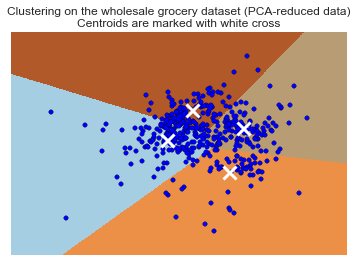

['Fresh' 'Milk' 'Grocery' 'Frozen' 'Detergents_Paper' 'Delicatessen']
[[-0.89796442 -0.25166509]
 [ 1.03247972  0.23832293]
 [ 0.68845834 -1.60582943]
 [-0.26798491  1.00939304]]
[[-0.03694911 -0.8338563  -0.83200945  0.01255108 -0.78229607 -0.47991717]
 [ 0.00403313  0.95009792  0.95705378 -0.05282106  0.90395295  0.51727056]
 [-1.3267363   0.33375521  0.65230873 -1.36253279  0.757261   -0.84923132]
 [ 0.80595343 -0.06463263 -0.25699386  0.81942698 -0.32841389  0.59062267]]

>>>>>>>>>>   Explainatin and suitability of K-Means for this dataset.   <<<<<<<<<< 


	 K-Means assumes that data is evenly distributed which is not the case here.  

	 K-Means centroids are shifted towards higher-density, which is not helpful in this case.

	 Moreover straight boundaries, and hence K-Means, are not appropriate to this case.



In [48]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.scatter(reduced_data[:,0],reduced_data[:,1])
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

print scaled_data.columns.values
print centroids
print pca.inverse_transform(centroids)

print "\n",'>'*10,"  Explainatin and suitability of K-Means for this dataset.  ", '<'*10 ,"\n"
print "\n\t K-Means assumes that data is evenly distributed which is not the case here.  \n"
print "\t K-Means centroids are shifted towards higher-density, which is not helpful in this case.\n"
print "\t Moreover straight boundaries, and hence K-Means, are not appropriate to this case.\n"

[[ 1.83999227  1.98965168]
 [ 0.28783612  0.41570473]
 [ 0.27489734  1.07644806]
 [ 0.35712555  0.25060867]]

i= 0
mean: [-0.47267235 -1.00399367]
covar: [[ 1.83999227  0.        ]
 [ 0.          1.98965168]]
color: r
inverse of Mean [-0.67598858 -0.58696937 -0.43096957 -0.64888859 -0.33548432 -0.84235181]

i= 1
mean: [-0.32662229  0.62810667]
covar: [[ 0.28783612  0.        ]
 [ 0.          0.41570473]]
color: g
inverse of Mean [ 0.52868802 -0.18105998 -0.30840006  0.54583099 -0.34755502  0.31239936]

i= 2
mean: [ 0.99712307 -0.06560131]
covar: [[ 0.27489734  0.        ]
 [ 0.          1.07644806]]
color: b
inverse of Mean [-0.2189107   0.86732214  0.9266506  -0.27346367  0.89889186  0.29942317]

i= 3
mean: [-0.66270201 -0.07242248]
covar: [[ 0.35712555  0.        ]
 [ 0.          0.25060867]]
color: c
inverse of Mean [ 0.05808881 -0.59614275 -0.6149351   0.09448446 -0.58725837 -0.2775094 ]
['Fresh' 'Milk' 'Grocery' 'Frozen' 'Detergents_Paper' 'Delicatessen']

 GMM Means:
[[-0.6759885

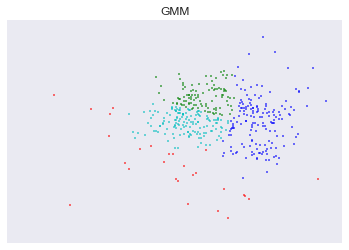

Data with  cluster identifier.
      Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen  pred
435 4.47280 4.08102  4.20485 4.11843           2.26007       3.34321     1
436 4.59360 3.15564  2.88309 3.65418           1.96848       3.37033     1
437 4.16230 4.19000  4.48062 2.64048           4.17146       3.27114     2
438 4.01242 3.29688  3.34869 3.01620           2.22531       3.32736     3
439 3.44514 3.22994  3.39967 1.81291           2.67852       1.71600     0


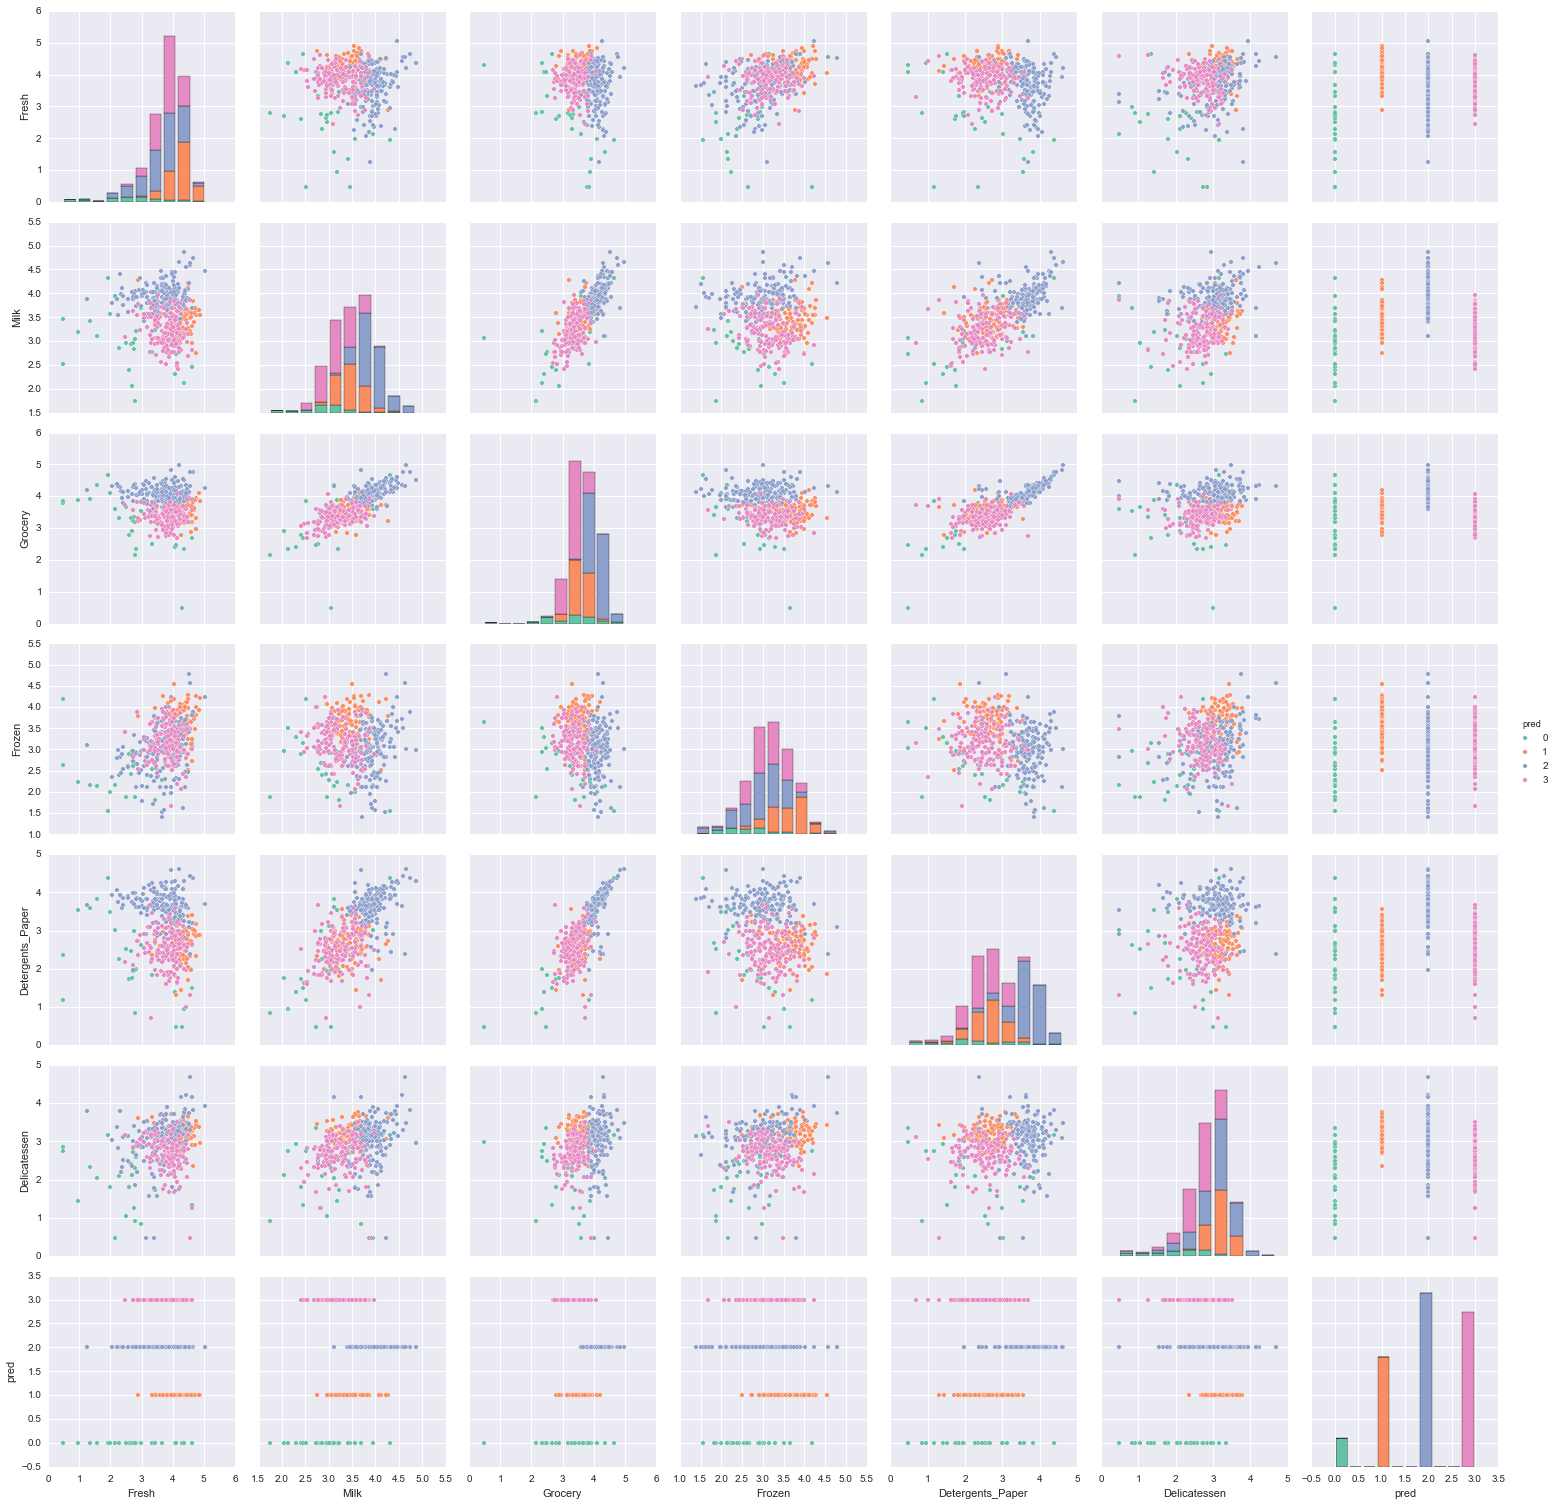

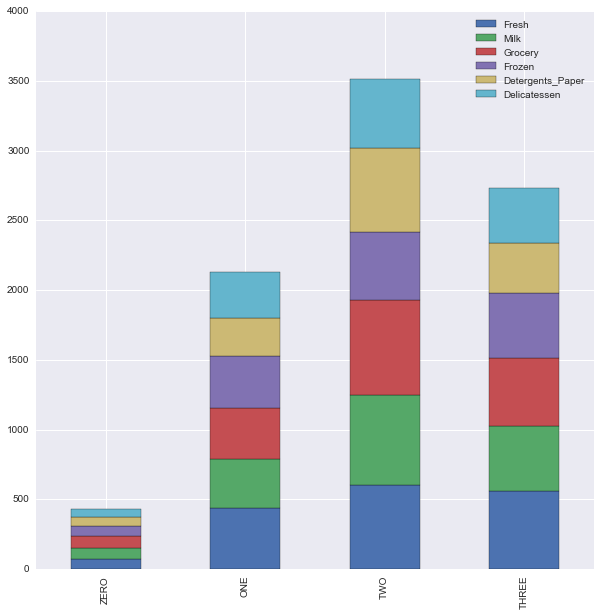

In [49]:
from matplotlib.colors import LogNorm
import matplotlib as mpl
import itertools
from scipy import linalg


gmm=GMM(n_components=4).fit(reduced_data)

color_iter = ['r', 'g', 'b','c']

print gmm.covars_
Y_ = gmm.predict(reduced_data)

for i, (mean, covar, color) in enumerate(zip(gmm.means_, gmm._get_covars(), color_iter)):
        print "\ni=",i
        print "mean:", mean
        print "covar:", covar
        print "color:",color
        print "inverse of Mean", pca.inverse_transform(mean)
        v, w = linalg.eigh(covar)
        u = w[0] / linalg.norm(w[0])
        plt.scatter(reduced_data[Y_ == i, 0], reduced_data[Y_ == i, 1], 2, color=color, alpha=0.9)

print data.columns.values
inv_means=pca.inverse_transform(gmm.means_)

print "\n GMM Means:\n",inv_means
 
#plt.xlim(-5, 5)
#plt.ylim(-6, 6)
plt.xticks(())
plt.yticks(())
plt.title("GMM")
plt.figure(figsize=(3,3),facecolor=".6")
plt.show()




updated_data=data.copy(deep=True)
#updated_data['total']=updated_data.apply(np.sum, axis=1).tolist()
print "Data with  cluster identifier."
updated_data['pred']=Y_.tolist()
print updated_data.tail(5)

sns.pairplot(updated_data,size=3, hue="pred",palette="Set2");


summary_data_high = updated_data.copy(deep=True)
summary_data_high=summary_data_high[(summary_data_high.pred==0)].apply(np.sum,axis=0)
summary_data_all=pd.DataFrame(summary_data_high.iloc[:6],columns=['ZERO'])


summary_data_low = updated_data.copy(deep=True)
summary_data_low=summary_data_low[(summary_data_low.pred==1)].apply(np.sum,axis=0)
summary_data_low=summary_data_low.iloc[:6].values
summary_data_all['ONE']=summary_data_low

summary_data_low = updated_data.copy(deep=True)
summary_data_low=summary_data_low[(summary_data_low.pred==2)].apply(np.sum,axis=0)
summary_data_low=summary_data_low.iloc[:6].values
summary_data_all['TWO']=summary_data_low

summary_data_low = updated_data.copy(deep=True)
summary_data_low=summary_data_low[(summary_data_low.pred==3)].apply(np.sum,axis=0)
summary_data_low=summary_data_low.iloc[:6].values
summary_data_all['THREE']=summary_data_low


summary_data_all.T.plot(kind='bar', stacked=True,figsize=(10, 10))



## GMM seems more appropriate for this data set, as it is based on latent Gaussians.
## GMM also doesn't assume isotropic data, and supports soft clustering, which is fit for this data set.
## Other reasons are as mentioned in comparision of K-means and GMM above.

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: 

Centroids in K_Means :

[[ 0.00403313  0.95009792  0.95705378 -0.05282106  0.90395295  0.51727056]
 [ 0.8105169  -0.06205156 -0.25547742  0.82389024 -0.32746539  0.59556167]
 [-1.3267363   0.33375521  0.65230873 -1.36253279  0.757261   -0.84923132]
 [-0.03466114 -0.83062526 -0.82929605  0.0146728  -0.7799749  -0.47639274]]
 
Explaination
1.) Shops that buy mostly Milk, Groceries, and Detergent_Paper.
2.) Shops that buy mostly  Fresh, and Frozen.
3.) Shops that buy mostly  Milk, Groceries, and Detergent_Paper.
4.) SShops that buy mostly small qty of everything.



Centroids in GMMs are:

[-0.71886443 -0.56901511 -0.40266095 -0.69335059 -0.30418179 -0.86591711]
 [ 0.0371836  -0.5814838  -0.59517842  0.07245224 -0.56636963 -0.28580387]
 [-0.19930608  0.86599535  0.92064671 -0.253546    0.89113709  0.31392271]
 [ 0.49756216 -0.24834402 -0.36883649  0.51836399 -0.40136078  0.25182844]]
 

1.) Shops that buy mostly small qty of everything.
2.) Shops that buy mostly fresh and Frozen.
3.) Shops that buy mostly milk, Grocery, and Detergent_Paper.
4.) Shops that buy mostly Fresh, Frozen, and Delicacies.


###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer:

Tried multiple number of clusters for GMM and k-means, and 4 seemed best for k-means and also for GMMs.


k-Means groups data based on similarity, while GMM is bayesian and creates a model of mixtures and then assigns data to these models.

Also K-means is based on specific values and identifies centroids, while GMM is probabilistic and estimates the gaussians. 
K-Means assumes that variance of distribution is spherical, while GMM does not make such assumption.

k-means also assumes that observations are homogeneously distributes across clusters, which is not the case here.

K-Means creates hard boundaries, while GMM creates soft boundaries.

GMM identifies hidden factors, which is what we are trying to identify here.

All 3 techniques gave different information, and collating all 3 techniques gives confidence in solution. PCA gave more direct info on primary conponents, while ICA and Clustering gave insight into source and unlabeled similarity in data.

# But GMMs seem to be best suited for such a problem, as observations are not equally distributed across clusters, and there is NO info that suggests that variance distribution is spherical.


Clusters created using K-means are not compact, and the boudaries dont reflect the irregular distribution of points.

While GMM alows non-linear and soft boundaries, thus allowing more realistic explanation of clustering.

So GMM and ICA provide most info about the latent factors.


**9)** How would you use that technique to help the company design new experiments?

 A/B tests should give results in short time.
 So long running tests are not advisable.
 
 Based on above analysis, we understand that there are 4 types of shops based on purchase units, and 4 types of shops based on product-type distribution.
 
 Now there could be 2 types of tests:
 Type 1. That are visible to the users (shops, in this case).
 Type 2. Those that are not easily visible to the customers.
 
 
Lets take an example of 2 Tests that are visible to customers.
Here we try to find out the best mechanizm to deliver products.
Test 2 will follow results from Test 1.

Test 1: Divide the "ONE" group or LOW purchase group, as it has smallest purchase units, further into 2 groups - "Control" and "Test" group.
Each sub-group should have same proportion of each of the 4 types of shops.
Control group will get the regular morning delivery (PUSH), while the Test group can choose the time of their choice for delivery (PULL).

Null hypothesis here is that morning delivery is best solution for "low" shops.

Results from this test will show either of these things:
a.) If there is a common time during day or frequency that is more suitable for deliveries.
b.) Do customers (shops) buy more products if they are given a choice in delivery schedule.
c.) If there is a change in delivery costs.

Based on results of above test, we can run another A/B test to find if other 3 types of customers - forming a HIGH group as they have  purchase values that are flexible with delivery times. Delivery trips for "PULL" deliveries for "LOW" shops can be used to delivery goods to "HIGH" shops at times other than normal morning and bulk evening deliveries. 

Here, since "High" group was able to absorb the changes in original test, we run this 2nd A/B test to find out if their flexibility can be used to reduce delivery costs.

Null hypothesis here is that same delivery schedule suits all "HIGH" stores.

Here we divide the "High" group in 2 sub-groups, each having same proportion of the 4-types of shops. Control group "A" will receive the bulk delivery, and the Test group B will get delivery at the optimal time-of-day, say afternoon, as found in Test 1 above.
This test would answer following questions:
a.) If the on-demand time of Low stores is also suitable for "High" group stores.
b.) Do stores buy more / less with change in delivery times.
c.) Is there a change in delivery costs.
d.) Is there an impact on wholeseller's inventory costs.

Based on results of Test 1 and Test 2, we would know:
1. What time(s) during day is most suitable for each type of store.
2. Can deliveries be combined for Low and High group stores.
3. Get more data points, like impact of distance, reason for flexibility, for further insight and better models. 

Further A/B test could be to divide all shops into 2 sub-groups. Here the control group will receive all items in the regular morning delivery. Test group  will receive one type of product in bulk evening delivery, but all other items in regular morning delivery. We then repeat this test for all 6 products. This will help identify time-sensitivity towards different products and of different store types.

Note: Run-time of these tests could be pre-decided to avoid any niases during execution period, FOr example, Test 1 could be run for 2 weeks, and results be analyzed for a week. And then Test 2 could be run again for 2 weeks. This 5 week period should be such that it is not around any major shopping / festive season, to avoid reduce biases.


**10)** How would you use that data to help you predict future customer needs?

##### Answer: 
We have added the 'Ppred' column to the original data, based on the cluster to which each data point belongs.
'Pred' can be used as a Label in supervised learning. Given the qty of various items of a future customer (store), its suitable label and hence other attributes, like best delivery mechanism can be predicted.

Based on ICA anlaysis, we found that there are 4 groups of stores.

For a new store, first step would be to identify what is the primary product that store buys.
Using a classification model, we can use this info to map store to any of above 4 types of stores, and use that to predict other trends associated with the stores of that type.

We can then train  supervised regression algorithms to predict the purchase units of milk, given the purchase units of all other products, and these would be 2 separate models, one for "Low" and another for "High" cluster. 

Similarly we can train a classificaiton model to classify a store as belonging to either of these 2 groups by using purchase unit of any 5 product types.

For example, if there is a new store that is only purchasing Grocery, Fresh, Frozen, Detergent_Paper, and Delicacies.  
Using this data and our trained classificaiton and regression models, we can prodect if the store belongs to "Low" or "High" group, and also predict its requirement of Milk.



